# **Regressin Simple**

In [116]:
import pandas as pd 
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
import scipy.stats
from scipy.optimize import minimize
import statsmodels.api as sm
import statsmodels.formula.api as smf

import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


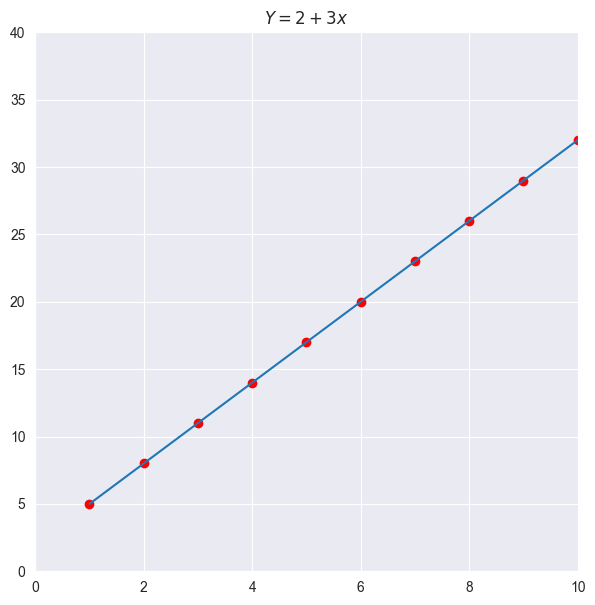

In [117]:
x=np.linspace(1,10,10)
y=2+3*x
fig,ax=plt.subplots(figsize=(7,7))
ax.plot(x,y)
ax.scatter(x,y,c='r')
ax.grid()
ax.set_title("$Y=2+3x$")
ax.set_xlim(0,10)
ax.set_ylim(0,40)
plt.show()

**Ordinary Least Squares**

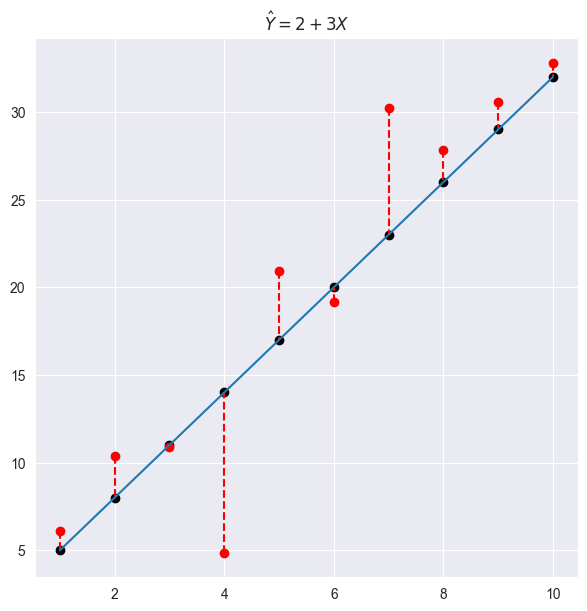

In [118]:
beta1, beta2 = 2, 3
def gen_linreg_data(beta1, beta2, samp_size, disturb_scale):

    X = np.linspace(1, 10, samp_size)
    u = disturb_scale * np.random.randn(samp_size)
    Y = beta1 + beta2*X + u
    Y_hat = beta1 + beta2*X
    return X, Y, Y_hat

def plot_lin_reg(X, Y, Y_hat):
    fig, ax = plt.subplots(figsize = (7, 7))

    for i in range(len(Y)):
        dot_fit_values = [X[i], X[i]]
        dot_org_values = [Y[i], Y_hat[i]]
        ax.plot(dot_fit_values, dot_org_values, linestyle = '--', color = 'red', label = 'residual')

    ax.plot(X, Y_hat)
    ax.scatter(X, Y_hat, c = 'k')
    ax.scatter(X, Y, c ='r')
    ax.grid()
    ax.set_title('$\hat Y ={}+{}X$'.format(beta1, beta2))
    plt.show()

if __name__ == '__main__':
    X, Y, Y_hat = gen_linreg_data(beta1=beta1, beta2=beta2, samp_size=10, disturb_scale=5)
    plot_lin_reg(X, Y, Y_hat)

**Score updated**

In [119]:
df=pd.read_csv('score_updated.csv',sep=',')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   96 non-null     float64
 1   Scores  96 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


In [121]:
df.shape

(96, 2)

In [122]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

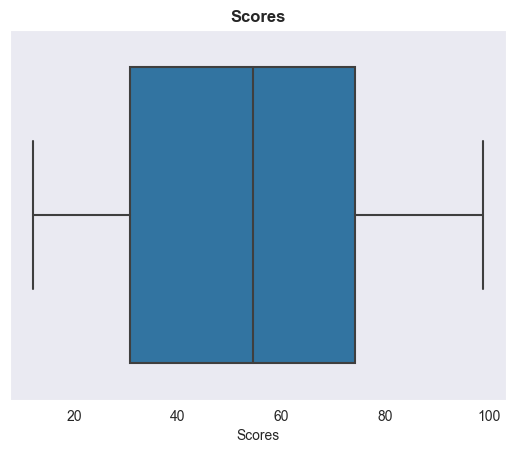

In [123]:
sns.boxplot(data=df,x='Scores')
plt.title('Scores',weight='bold')
plt.show()

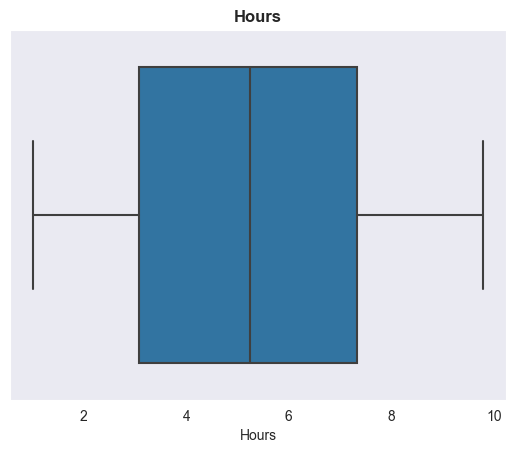

In [124]:
sns.boxplot(data=df,x='Hours')
plt.title('Hours',weight='bold')
plt.show()

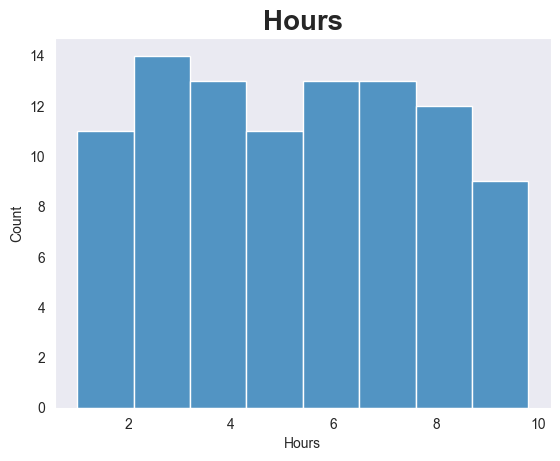

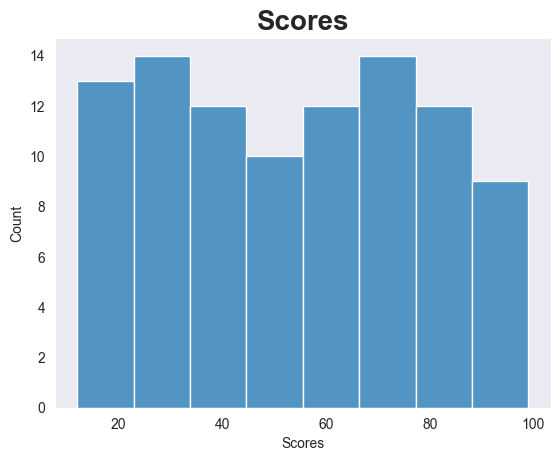

In [125]:
for i in df.columns:
    sns.histplot(data=df,x=i)
    plt.title(i,fontsize=20,weight="bold")
    plt.show()

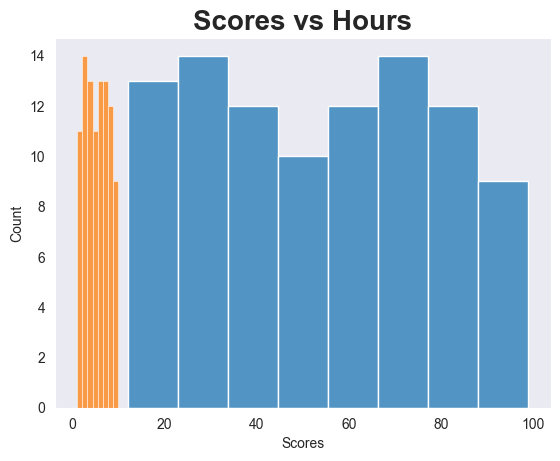

In [126]:
sns.histplot(data=df,x='Scores')
sns.histplot(data=df,x='Hours')
plt.title('Scores vs Hours',fontsize=20,weight="bold")
plt.show()

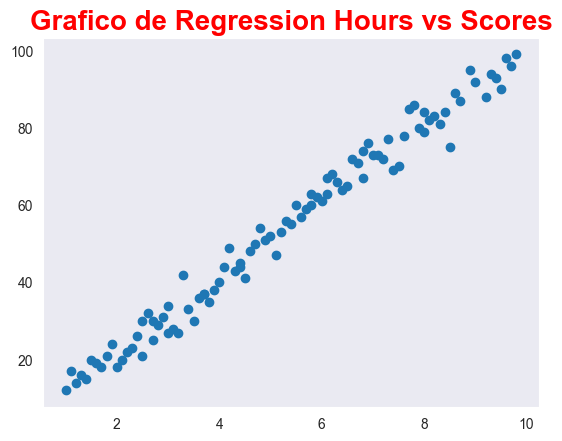

In [127]:
plt.scatter(df['Hours'],df['Scores'])
plt.title('Grafico de Regression Hours vs Scores',fontsize=20,weight='bold', c ='r')
plt.show()

In [128]:
fig=px.scatter(df,
              x='Hours',
              y='Scores',
              opacity=0.8,
              title='Hours vs. Scores')
fig.update_traces(marker_size=5)
plt.figure(figsize=(10,6))
fig.show();

<Figure size 1000x600 with 0 Axes>

In [129]:
df.describe()

,Hours,Scores
count,96.000000,96.000000
mean,5.267708,54.020833
std,2.503030,25.017459
min,1.000000,12.000000
25%,3.075000,30.750000
50%,5.250000,54.500000
75%,7.325000,74.250000
max,9.800000,99.000000


In [130]:
df.corr()

,Hours,Scores
Hours,1.00000,0.99064
Scores,0.99064,1.00000


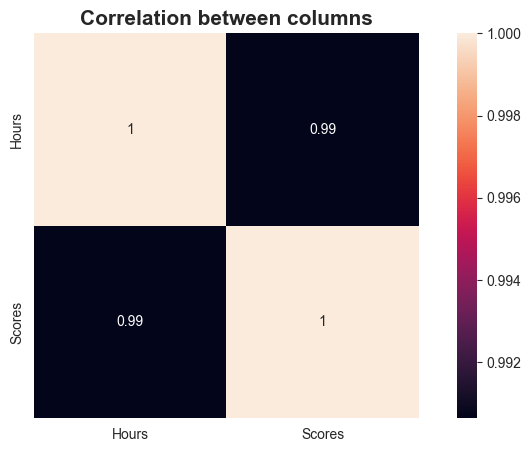

In [131]:
fig,ax=plt.subplots()
fig.set_size_inches(10,5)
sns.heatmap(df.corr(),square=True, annot=True)
plt.title('Correlation between columns',fontsize=15,weight='bold')
plt.show()


In [132]:
x=df['Hours']
y=df['Scores']

x= sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     4951.
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           4.18e-83
Time:                        15:57:01   Log-Likelihood:                -253.62
No. Observations:                  96   AIC:                             511.2
Df Residuals:                      94   BIC:                             516.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8636      0.820      2.273      0.0

In [133]:
model.params

const    1.863577
Hours    9.901318
dtype: float64

In [134]:
model.fittedvalues

0     26.616872
1     52.360300
2     33.547795
3     86.024782
4     36.518191
        ...    
91    59.291223
92    45.429377
93    62.261618
94    38.498454
95    81.074123
Length: 96, dtype: float64

## **Scikit Learn**

In [135]:
inputs = df.drop(columns = ['Scores'], axis = 1, inplace=False)
targets = df.drop(columns = ['Hours'], axis = 1, inplace=False)

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [137]:
train_inputs,test_inputs, train_targets, test_targets = train_test_split( inputs, targets, test_size=0.2, random_state=42)

In [138]:
model=LinearRegression()

In [139]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [140]:
model.fit(train_inputs, train_targets)

LinearRegression()

In [141]:
print("Coefficient of the model: ",model.coef_)
print("Intercept of the model: ", model.intercept_)

Coefficient of the model:  [[9.83563508]]
Intercept of the model:  [2.44056559]


In [142]:
train_predictions=model.predict(train_inputs)
train_predictions

array([[20.14470873],
       [96.86266234],
       [89.97771778],
       [69.32288412],
       [31.94747083],
       [28.9967803 ],
       [45.71735993],
       [60.47081255],
       [42.76666941],
       [47.68448695],
       [25.06252627],
       [88.01059077],
       [44.73379643],
       [17.19401821],
       [74.24070166],
       [58.50368554],
       [24.07896276],
       [27.02965329],
       [32.93103433],
       [40.7995424 ],
       [56.53655852],
       [59.48724904],
       [59.48724904],
       [75.22426517],
       [57.52012203],
       [43.75023292],
       [71.29001114],
       [34.89816135],
       [79.1585192 ],
       [86.04346375],
       [21.12827224],
       [54.5694315 ],
       [84.07633674],
       [14.24332769],
       [92.92840831],
       [35.88172486],
       [72.27357464],
       [41.7831059 ],
       [85.05990025],
       [81.12564621],
       [26.04608978],
       [38.83241538],
       [29.98034381],
       [83.09277323],
       [81.12564621],
       [16

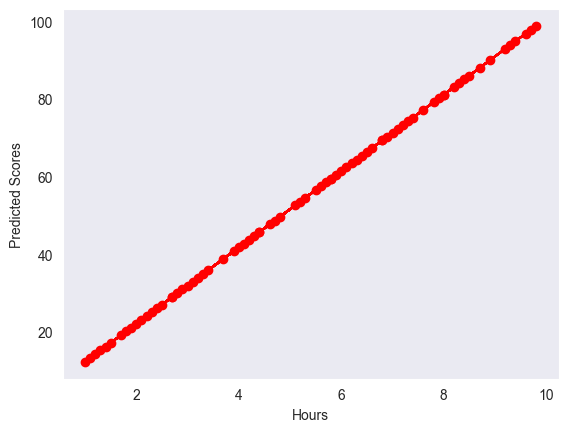

In [143]:
plt.plot(train_inputs, train_predictions, 'r-o');
plt.xlabel('Hours');
plt.ylabel('Predicted Scores')
plt.show()

In [144]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

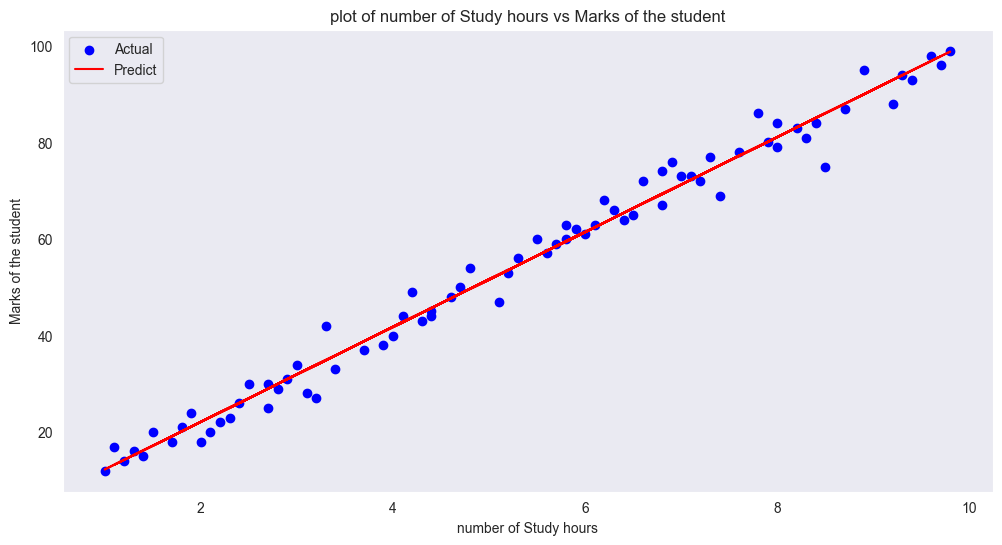

In [145]:
plt.figure(figsize = (12, 6))
sns.set_style("dark")
plt.scatter(train_inputs, train_targets, color='blue')
plt.plot(train_inputs, train_predictions,color='red')
plt.xlabel("number of Study hours")
plt.ylabel("Marks of the student")
plt.title("plot of number of Study hours vs Marks of the student")
plt.legend(['Actual','Predict']);

In [146]:
score = model.score(train_inputs, train_targets)
print("Accuracy: ", round(score*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(train_targets,train_predictions)), 2))

Accuracy:  98.38
RMSE:      3.19


In [147]:
test_predictions=model.predict(test_inputs)
test_predictions

array([[28.01321679],
       [50.63517747],
       [31.94747083],
       [38.83241538],
       [82.10920972],
       [87.02702726],
       [76.20782868],
       [68.33932061],
       [27.02965329],
       [78.17495569],
       [55.55299501],
       [18.17758172],
       [62.43793957],
       [36.86528836],
       [90.96128129],
       [95.87909883],
       [46.70092344],
       [39.81597889],
       [37.84885187],
       [51.61874098]])

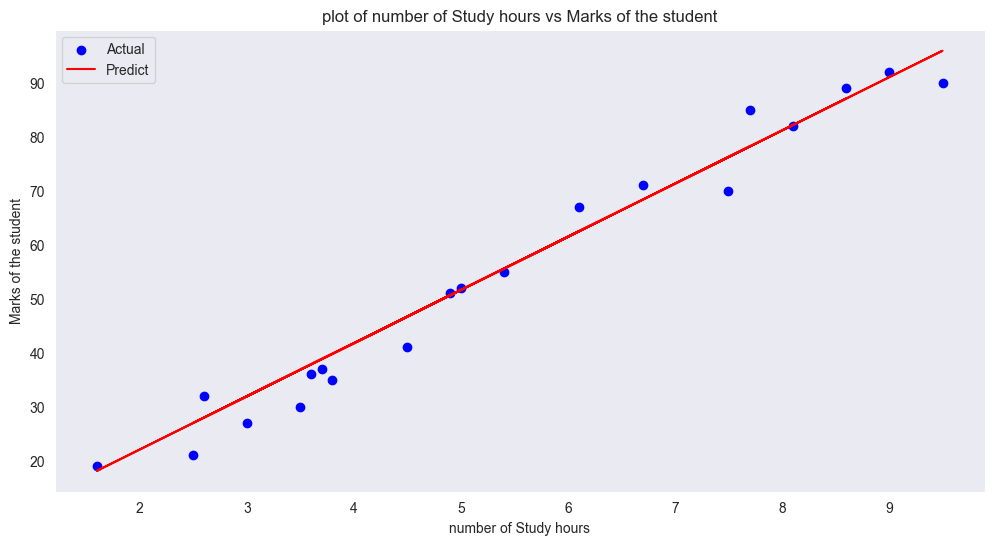

In [148]:
plt.figure(figsize = (12, 6))
sns.set_style("dark")
plt.scatter(test_inputs, test_targets, color='blue')
plt.plot(test_inputs, test_predictions,color='red')
plt.xlabel("number of Study hours")
plt.ylabel("Marks of the student")
plt.title("plot of number of Study hours vs Marks of the student")
plt.legend(['Actual','Predict']);

In [149]:
score = model.score(test_inputs, test_targets)
print("Accuracy: ", round(score*100, 2))
print("RMSE:     ",round(np.sqrt(mean_squared_error(test_targets,test_predictions)), 2))

Accuracy:  97.09
RMSE:      4.12


### Predicciones

In [150]:
print("Marks of student who studied 10 hours a day:  ", model.predict([[10]]))

Marks of student who studied 10 hours a day:   [[100.79691637]]


In [151]:
print("Marks of student who studied 9.25 hours a day:  ", model.predict([[9.25]]))

Marks of student who studied 9.25 hours a day:   [[93.42019006]]
